Original Pick Rate Values:
0    69%
1    56%
2    56%
3    44%
4    38%
5    31%
6    31%
7    25%
8    25%
9    25%
Name: Pick Rate, dtype: object
Cleaned Pick Rate Values:
count    24840.000000
mean        20.846940
std         32.861284
min          0.000000
25%          0.000000
50%          0.000000
75%         38.000000
max        100.000000
Name: Pick Rate, dtype: float64
Filtered Data contains 2640 rows.
Pivot Table:
Map            Abyss  All Maps  Ascent       Bind  Haven      Icebox  \
Agent                                                                  
astra      56.916667     10.80    0.00  13.428571    0.0    0.000000   
breach      0.000000     23.40    0.00   0.000000   66.7    0.000000   
brimstone   0.000000     12.40    0.00  74.857143    0.0    0.000000   
chamber     0.000000      4.04    0.00   7.642857    0.0    0.000000   
clove       0.000000      4.24    9.50   0.000000    0.0    0.000000   
cypher     77.083333     39.08   40.75  15.500000   77.8    0.00000

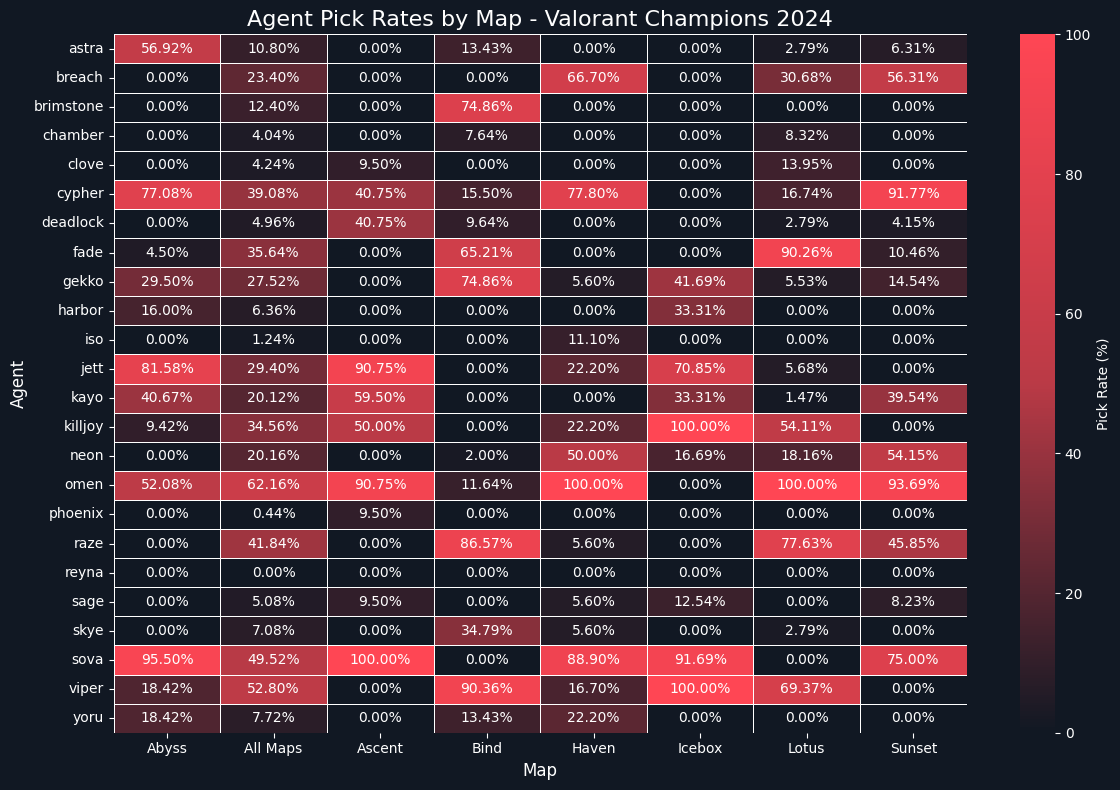

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

file_path = "valorant_data/vct_2024/agents/agents_pick_rates.csv"
data = pd.read_csv(file_path)

print("Original Pick Rate Values:")
print(data["Pick Rate"].head(10))

data["Pick Rate"] = data["Pick Rate"].str.replace("%", "", regex=True).astype(float)

print("Cleaned Pick Rate Values:")
print(data["Pick Rate"].describe())

filtered_data = data[data["Tournament"] == "Valorant Champions 2024"]
print(f"Filtered Data contains {len(filtered_data)} rows.")

heatmap_data = filtered_data.pivot_table(
    index="Agent", columns="Map", values="Pick Rate", aggfunc="mean"
)

heatmap_data = heatmap_data.fillna(0)
print("Pivot Table:")
print(heatmap_data)


agent_distances = pdist(heatmap_data, metric='euclidean')
agent_linkage = linkage(agent_distances, method='ward')

map_distances = pdist(heatmap_data.T, metric='euclidean') 
map_linkage = linkage(map_distances, method='ward')

agent_dendrogram = dendrogram(agent_linkage, no_plot=True)
map_dendrogram = dendrogram(map_linkage, no_plot=True)

reordered_agents = agent_dendrogram['leaves']
reordered_maps = map_dendrogram['leaves']

ordered_heatmap_data = heatmap_data.iloc[reordered_agents, reordered_maps]

ordered_heatmap_data = ordered_heatmap_data[sorted(ordered_heatmap_data.columns)]
ordered_heatmap_data = ordered_heatmap_data.loc[sorted(ordered_heatmap_data.index)]

colors = ["#111823", "#ba3a46", "#ff4654"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(12, 8), facecolor="#111823")

sns.heatmap(
    ordered_heatmap_data, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=0.5,
    cbar_kws={"label": "Pick Rate (%)"},
    annot_kws={"size": 10} 
)

for text in plt.gca().texts:
    new_value = f"{float(text.get_text()):.2f}%"
    text.set_text(new_value)

plt.title("Agent Pick Rates by Map - Valorant Champions 2024", fontsize=16, color="white")
plt.xlabel("Map", fontsize=12, color="white")
plt.ylabel("Agent", fontsize=12, color="white")

plt.gca().tick_params(axis="x", colors="white")
plt.gca().tick_params(axis="y", colors="white")

plt.gcf().axes[-1].yaxis.label.set_color('white')
plt.gcf().axes[-1].tick_params(axis='y', colors='white')

plt.grid(False)  

plt.tight_layout()
plt.show()
